# 10. En la tabla se presenta una venta de ventas trimestrales. Señalar el valor de la tendencia utilizando el método de las medias móviles, en el tercer trimestre.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("4.1.10.csv")
df.set_index("Trimestre/Año",inplace=True)
df

,1,2,3
Trimestre/Año,,,
1,110,111,112
2,100,98,102
3,105,106,108
4,95,96,98


In [3]:
df_flat=pd.DataFrame(df.values.ravel('F'))
df_flat.rename(columns={0: "Original"},inplace=True)
df_flat

,Original
0,110
1,100
2,105
3,95
4,111
5,98
6,106
7,96
8,112
9,102


In [4]:
for i in range(0,len(df_flat)-3):
    df_flat.loc[df_flat.index[i+1],'medias_móviles_no_centrada(4)'] = np.round(((df_flat.iloc[i,0]+ df_flat.iloc[i+1,0] + df_flat.iloc[i+2,0] + df_flat.iloc[i+3,0])/4),2)

In [5]:
df_flat

,Original,medias_móviles_no_centrada(4)
0,110,NaN
1,100,102.50
2,105,102.75
3,95,102.25
4,111,102.50
5,98,102.75
6,106,103.00
7,96,104.00
8,112,104.50
9,102,105.00


In [6]:
for i in range(1,len(df_flat)-2):
    df_flat.loc[df_flat.index[i+1],'medias_móviles_centrada(4)'] = np.round(((df_flat.iloc[i,1]+ df_flat.iloc[i+1,1])/2),4)

In [7]:
df_flat

,Original,medias_móviles_no_centrada(4),medias_móviles_centrada(4)
0,110,NaN,NaN
1,100,102.50,NaN
2,105,102.75,102.625
3,95,102.25,102.500
4,111,102.50,102.375
5,98,102.75,102.625
6,106,103.00,102.875
7,96,104.00,103.500
8,112,104.50,104.250
9,102,105.00,104.750


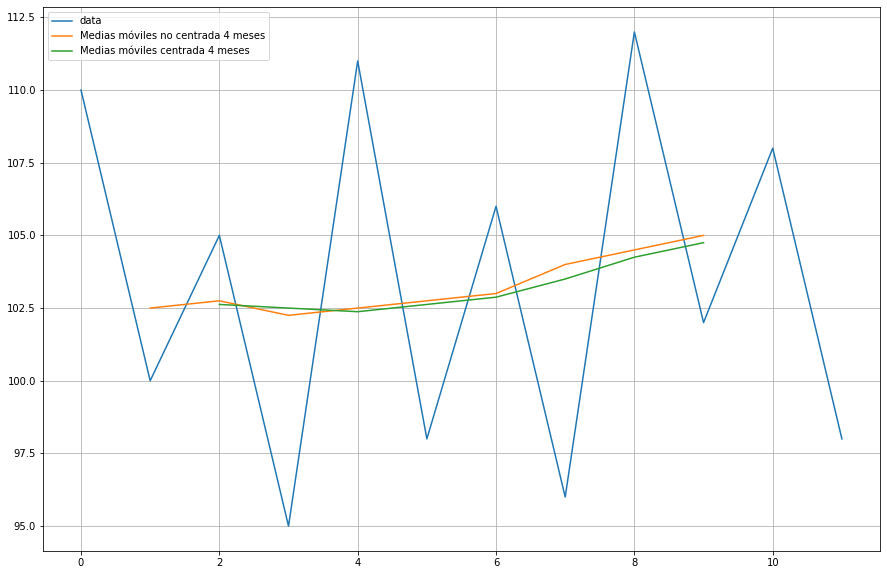

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_flat['Original'],label='data')
plt.plot(df_flat['medias_móviles_no_centrada(4)'],label='Medias móviles no centrada 4 meses')
plt.plot(df_flat['medias_móviles_centrada(4)'],label='Medias móviles centrada 4 meses')
plt.legend(loc=2)

### Como podemos ver la respuesta correcta es c) 102.625

# 11. La serie refleja el número de parados

Vamos a agregar el promedio como una fila al final de los datos

In [19]:
df2=pd.read_csv("4.1.11.csv")
df2.set_index("Trimestre/Año",inplace=True)
mean=df2.describe().loc["mean"]
df2=df2.append(mean,ignore_index=False)
df2

,1998,1999,2000
Trimestre/Año,,,
1,3442.40,3172.50,2760.8
2,3364.90,3070.00,2550.7
3,3325.80,3035.50,2548.5
4,3292.70,2963.40,2562.0
mean,3356.45,3060.35,2605.5


Reorganizaremos los datos para que sea más facil para hacer un modelo lineal

In [12]:
df_final=pd.DataFrame(df2.loc["mean"])
df_final["years"]=df_final.index
df_final["years"] = pd.to_numeric(df_final["years"])
df_final

,mean,years
1998,3356.45,1998
1999,3060.35,1999
2000,2605.50,2000


Con los datos organizados así, es más sencillo hacer un modelo lineal. Vemos que el modelo obtiene un $R^2$ cercano a la unidad

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
np.seterr(all='print')


results1 = smf.ols('mean ~ years ', data=df_final).fit()
print(results1.summary())
results1.params

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     67.13
Date:                Sat, 04 Jul 2020   Prob (F-statistic):             0.0773
Time:                        16:20:43   Log-Likelihood:                -15.123
No. Observations:                   3   AIC:                             34.25
Df Residuals:                       1   BIC:                             32.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.536e+05   9.16e+04      8.226      0.0

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/statistics-4NTnAiTz-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept    753581.958333
years          -375.475000
dtype: float64

Graficamos nuestros 3 datos para ver como se ajustan

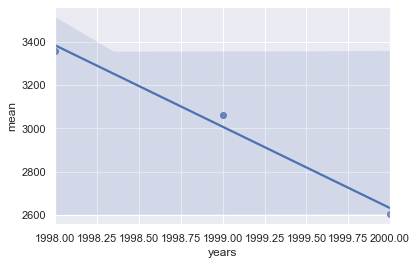

In [22]:
import seaborn as sns; sns.set(color_codes=True)
#tips = sns.load_dataset("tips")
ax = sns.regplot(x="years", y="mean", data=df_final)

## Vemos que la opción A es veradera, ya que esta es la ecuación resultante

$$\bar T_t = \hat{\bar{y}}_t = a + b \cdot  t $$

$$\bar T_{1999} = \hat{\bar{y}}_{1999} = 753581 + (-375) \cdot  1999 $$

In [15]:
a=results1.params.Intercept
b=results1.params.years

In [16]:
T_bar=a + b*(1999)
T_bar

3007.433333333931

$$T_{it}=\bar T_t + \Big [ i -\frac{k+1}{2}   \Big ]\cdot \frac{b}{k} $$

In [17]:
k = 4
print((k + 1)/2)
print(b/k)

2.5
-93.86874999999173


En nuestro caso particular tenemos que $\frac{k + 1}{2} = 2.5$, $\frac{b}{k} = -93.86$ y $\bar T = 3007.4333$

$$T_{it}=\bar T_t + \Big [ i -\frac{k+1}{2}   \Big ]\cdot \frac{b}{k} $$

$$T_{it}=\bar T_t  -93.86\cdot \Big [ i -2.5   \Big ] $$

$$T_{it}=3007.433 -93.86\cdot \Big [ i -2.5   \Big ] $$

## Vemos que la segunda ecuación de arriba es igual al inciso b) y comparando la última ecuación con el inciso c. Concluimos que es falsa